In [1]:
#loading the libraries
library(timeSeries)
# library(readxl)
library(ggplot2)
library(forecast)
library(tseries)
library(readr)
library(zoo)
library(tidyverse)
options(warn=-1)

Warning message:
“package ‘timeSeries’ was built under R version 4.2.1”
Loading required package: timeDate

Warning message:
“package ‘timeDate’ was built under R version 4.2.2”
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘zoo’


The following object is masked from ‘package:timeSeries’:

    time<-


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ purrr   0.3.4     ✔ forcats 1.0.0

Warning message:
“package ‘forcats’ was built under R version 4.2.2”
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks 

In [2]:
#What here I am creating a date series which will replace the dates from SARB data, then I check to make sure I have equal obs
dates <- seq(as.Date("2008-01-01"), as.Date("2022-12-31"), by="quarter")
length(dates)

[1] 60

In [3]:
#importing the data and skiping the irrelevant rows
data <- read_csv("/home/mngadil/Downloads/my_Unem_data.csv", show_col_types = FALSE)
length(data$Value)

[1] 60

In [4]:
#joining the synthetic date and Values from SARB data
df <- data.frame(dates,data$Value)

In [5]:
#just to check the data
# head(df)

In [6]:
#this is kind of unnecessary, am renaming variables just for convenience
colnames(df)[colnames(df) == "data.Value"] <- "Rates"
colnames(df)[colnames(df) == "dates"] <- "Dates"

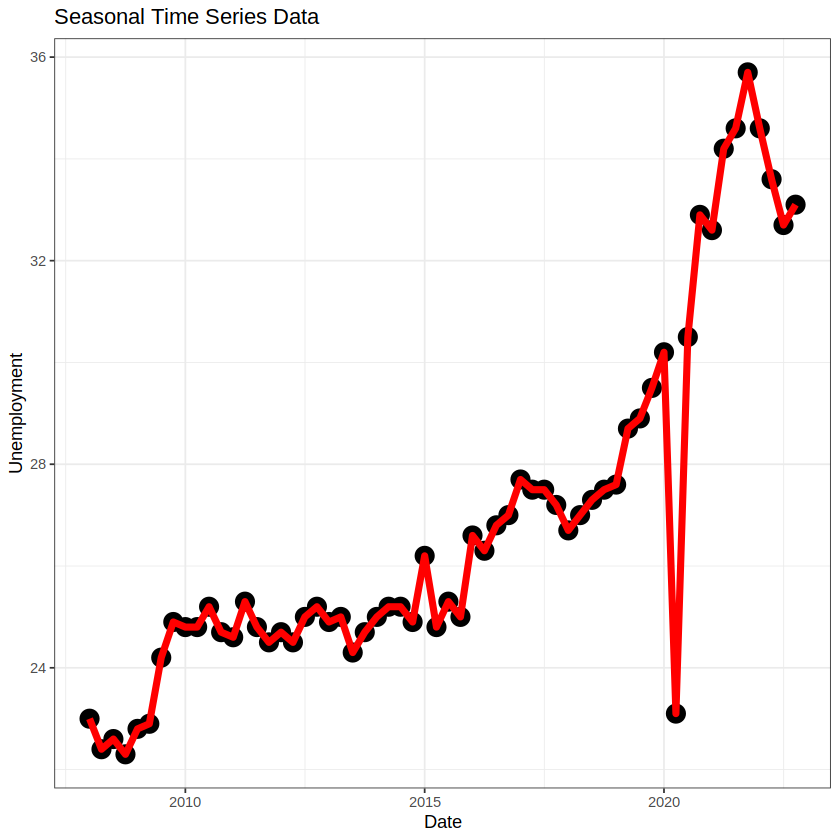

In [7]:

ggplot(df, aes(x = Dates, y = Rates)) +
geom_point(size=5) +  
geom_line(size=2, color="red") +
  labs(x = "Date", y = "Unemployment") +
  ggtitle("Seasonal Time Series Data") + theme_bw()

In [8]:
#from the above plot we can see it is not stationary, so we start differencing

In [9]:
# <- data.frame(Time = data$Time[-1], Value = differenced_data)
dif1 <- diff(df$Rate)
dif_df1 <- data.frame(Date=df$Dates[-1], Rates=dif1)

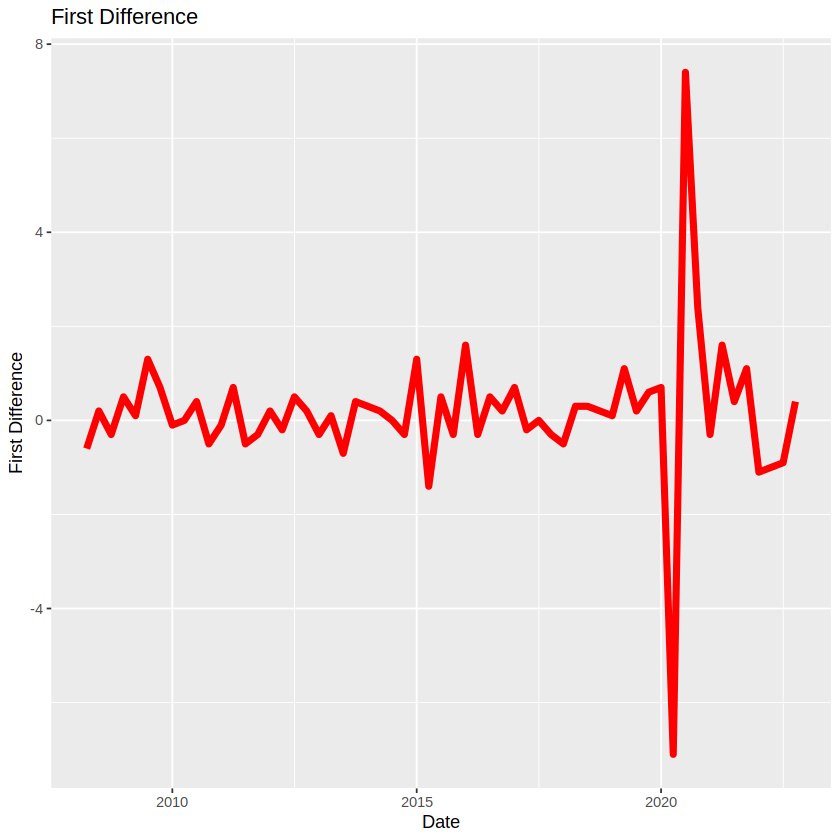

In [10]:
ggplot(dif_df1, aes(x = Date, y = Rates)) + 
geom_line(size=2, color="red") +
  labs(x = "Date", y = "First Difference") +
  ggtitle("First Difference")

In [11]:
#adf_test <- adf.test(data$Value)
#kpss_test <- kpss.test(data$Value)
adf_test <- adf.test(dif1)
kpss_test <- kpss.test(dif1)
adf_test
kpss_test


	Augmented Dickey-Fuller Test

data:  dif1
Dickey-Fuller = -4.4808, Lag order = 3, p-value = 0.01
alternative hypothesis: stationary



	KPSS Test for Level Stationarity

data:  dif1
KPSS Level = 0.074912, Truncation lag parameter = 3, p-value = 0.1


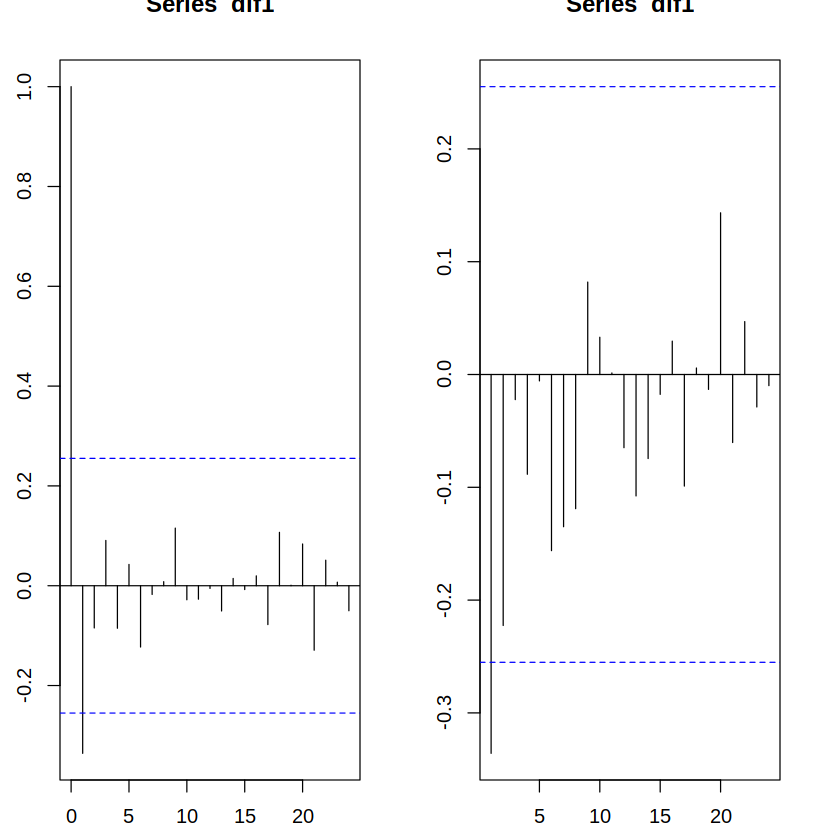

In [12]:
layout(matrix(1:2, nrow=1))
par(mai=c(0.5,0.5,0.5,0.5))
acf(dif1,lag=12, lag.max=24)
# pacf(dif1, lag=12, lag.max = 24)

In [23]:
# model1 <- Arima(df$Rates, order=c(1,1,0), seasonal=list(order=c(1,1,1), period=12))
model2 <- auto.arima(df$Rates)
summary(model2)

Series: df$Rates 
ARIMA(0,1,1) with drift 

Coefficients:
          ma1   drift
      -0.4713  0.1827
s.e.   0.1362  0.0961

sigma^2 = 1.948:  log likelihood = -102.49
AIC=210.99   AICc=211.42   BIC=217.22

Training set error measures:
                       ME     RMSE       MAE        MPE    MAPE    MASE
Training set -0.008115032 1.360298 0.7782797 -0.2672071 2.82187 1.02726
                   ACF1
Training set 0.03469389

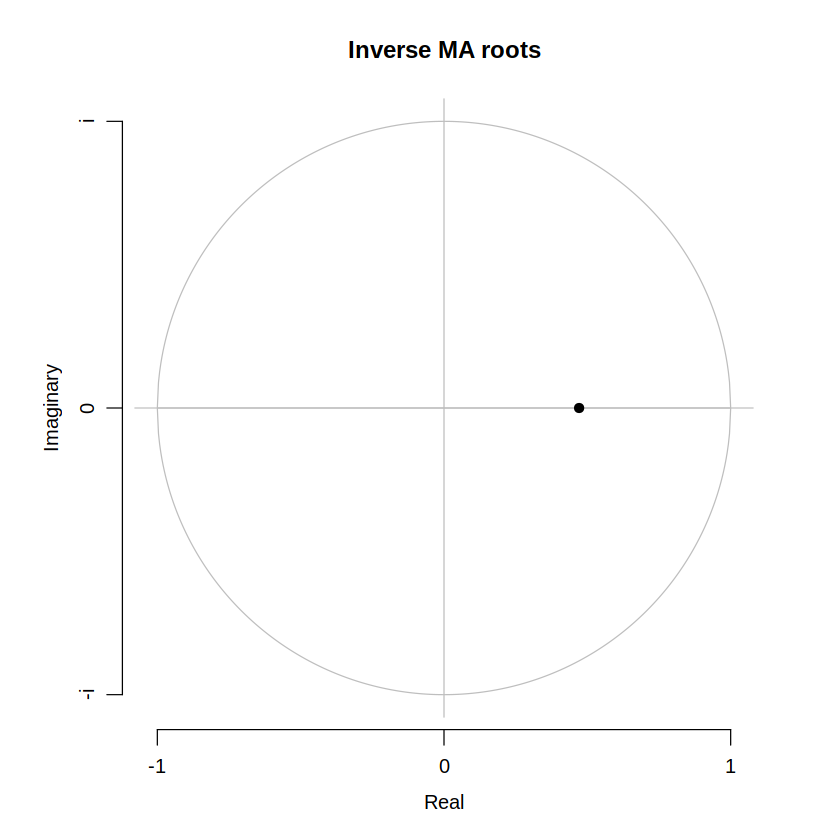

In [24]:
# model <- auto.arima(df$Rates)
par(mcol = c(2,1))
plot(model2)
# plot(model2)

In [15]:
auto_model <- auto.arima(df$Rates)

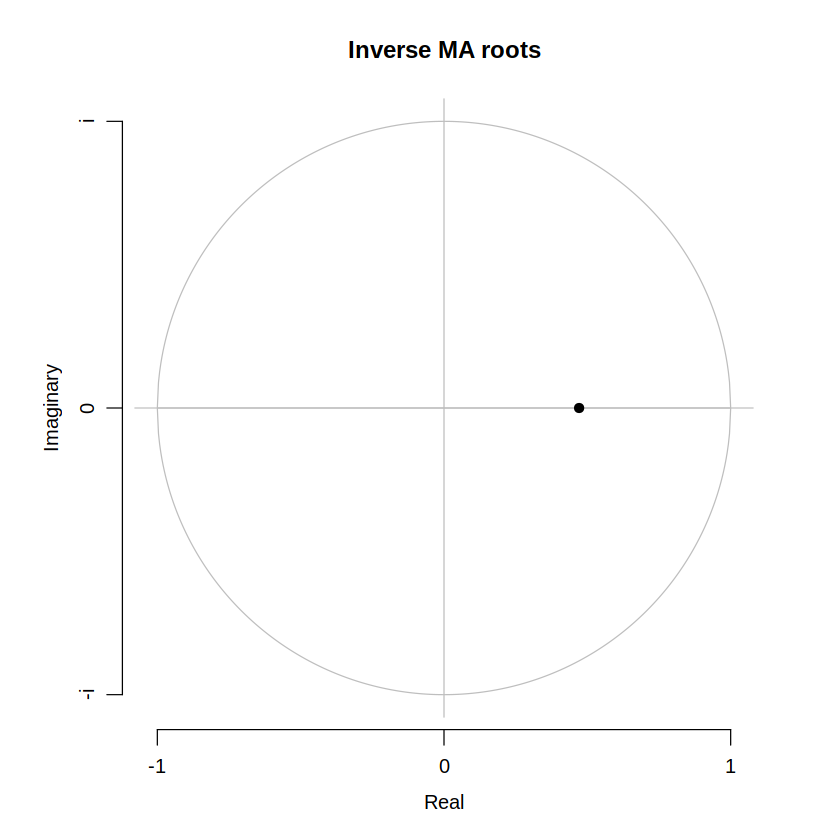

In [16]:
plot(auto_model)

In [27]:
pred1 <- forecast(model2, h=8)
pred2 <- forecast(model2, h=12)

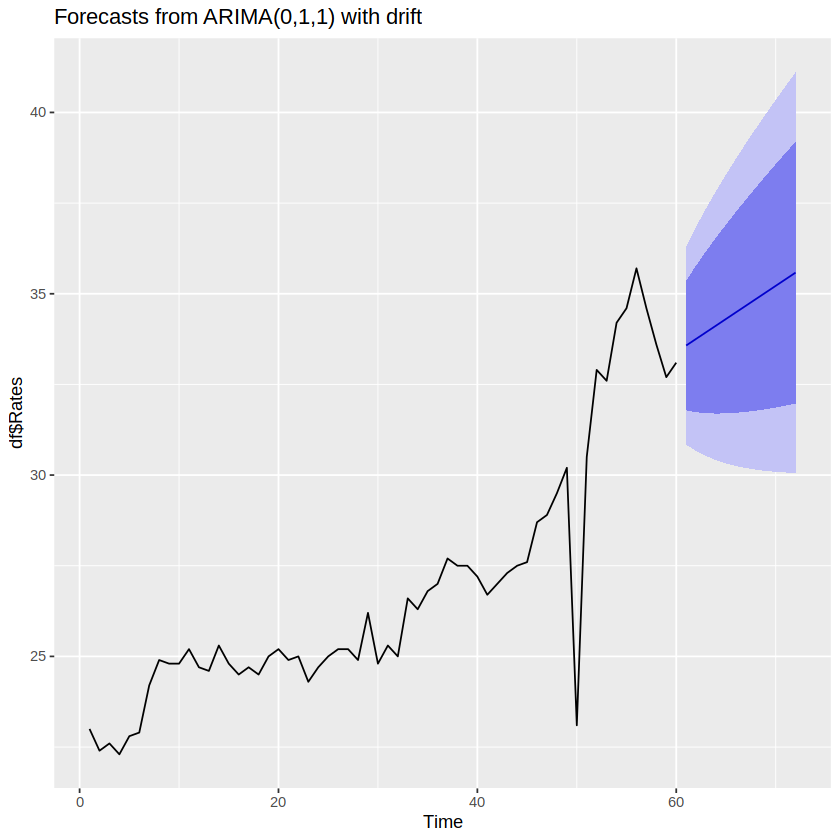

In [28]:
autoplot(pred2)
# autoplot(pred2)

# ggplot(pred1, aes(x = Dates, y = Rates)) +
# geom_point(size=5) +  
# geom_line(size=2, color="red") +
#   labs(x = "Date", y = "Unemployment") +
#   ggtitle("Seasonal Time Series Data") + theme_bw()

In [19]:
model_pred <- forecast(model, h=24)

ERROR: Error in forecast(model, h = 24): object 'model' not found


In [ ]:
plot(model_pred)